# Jupyter Notebook to Analyze ERA5 100m Wind data

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Product type:Reanalysis

Variable:100m u-component of wind, 100m v-component of wind, 10m u-component of wind, 10m v-component of wind

Year:2021, 2022, 2023

Month:January, February, March, April, May, June, July, August, September, October, November, December

Day:01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31

Time:00:00, 01:00, 02:00, 03:00, 04:00, 05:00, 06:00, 07:00, 08:00, 09:00, 10:00, 11:00, 12:00, 13:00, 14:00, 15:00, 16:00, 17:00, 18:00, 19:00, 20:00, 21:00, 22:00, 23:00

Sub-region extraction:North 55°, West 6°, South 47°, East 15°

Format:NetCDF (experimental)

In [3]:
f=xr.open_dataset('C:/Users/Anwender/Documents/GitHub/RiVaPy_development/ERA5_Data_netCDF/adaptor.mars.internal-1698057309.422591-30637-3-8c127153-a2da-4e09-9756-06435d022dfb.nc')

lons = f.variables['longitude'][:]  # longitude
lats = f.variables['latitude'][:]  # latitude
u100 = f.variables['u100'][:,0,:,:] # u-wind at 100m height
v100 = f.variables['v100'][:,0,:,:]  # v-wind at 100m height
u10 = f.variables['u10'][:,0,:,:]  # u-wind at 10m height
v10 = f.variables['v10'][:,0,:,:]  # v-wind at 10m height
time = f.variables['time'][:]

ws100 = np.array(np.sqrt(u100*u100+v100*v100))
ws10 = np.array(np.sqrt(u10*u10+v10*v10))

print(lons)
print(u100)



#f.close()

#print(f['v10'])


c:\Users\Anwender\.conda\envs\rivapy\lib\site-packages\gribapi\__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.23.0
  warnings.warn(


<xarray.IndexVariable 'longitude' (longitude: 37)>
array([ 6.  ,  6.25,  6.5 ,  6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,
        8.5 ,  8.75,  9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75,
       11.  , 11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
       13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  ], dtype=float32)
Attributes:
    units:      degrees_east
    long_name:  longitude
<xarray.Variable (time: 24490, latitude: 33, longitude: 37)>
array([[[1.267294, 1.337146, ..., 2.455603, 2.324215],
        [1.298062, 1.528406, ..., 2.21029 , 2.103019],
        ...,
        [1.565827, 1.712182, ..., 3.3038  , 3.255569],
        [1.605742, 1.606573, ..., 3.085099, 3.734552]],

       [[1.249   , 1.119275, ..., 1.916748, 1.825275],
        [1.110128, 1.295568, ..., 1.651478, 1.599921],
        ...,
        [1.470196, 1.942526, ..., 3.566575, 3.448493],
        [1.471028, 1.589942, ..., 3.26139 , 3.934959]],

       ...,

       [[     nan,      nan, ...,  

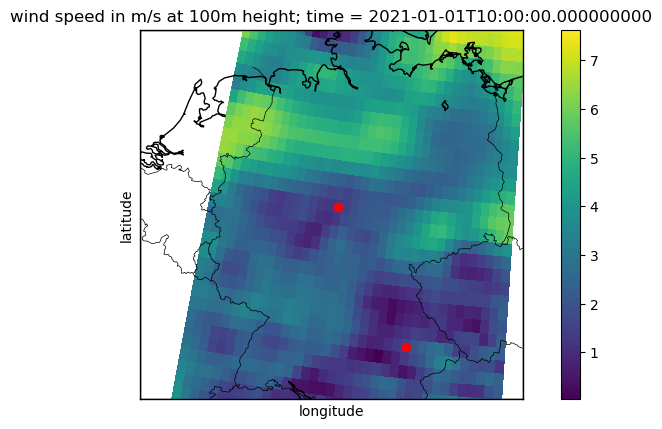

In [4]:
m = Basemap(llcrnrlon=5,llcrnrlat=47,urcrnrlon=15,urcrnrlat=55,
             resolution='i', projection='tmerc', lat_0 = 80, lon_0 = 20)

lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

#define two locations
loc1 = 15
loc2 = 25

x1,y1 = m(lon[loc1,loc1], lat[loc1,loc1])
x2,y2 = m(lon[loc2,loc2], lat[loc2,loc2])


cs = m.pcolor(xi,yi,np.squeeze(ws100[10,:,:]))

m.drawcoastlines()
m.drawmapboundary()
m.drawcountries()
cbar = m.colorbar(cs, location='right', pad="10%")
tt = np.array(time[10])
plt.title('wind speed in m/s at 100m height; time = '+str(tt))
plt.xlabel('longitude')
plt.ylabel('latitude')
#plt.plot(xi[lon1,lon1], yi[lat1,lat1],'ro')
plt.plot(x1, y1,'ro')
plt.plot(x2, y2,'ro')
plt.show()



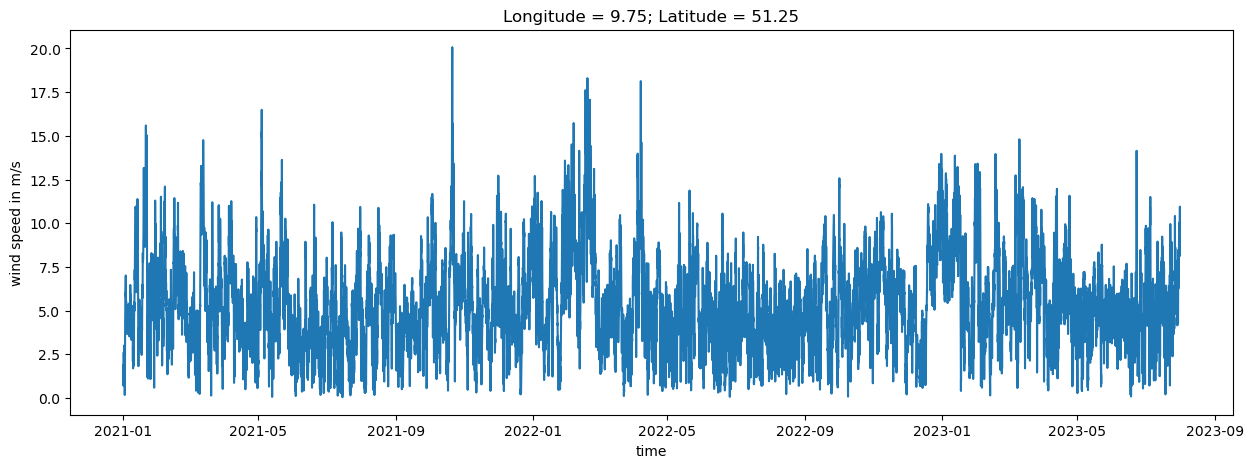

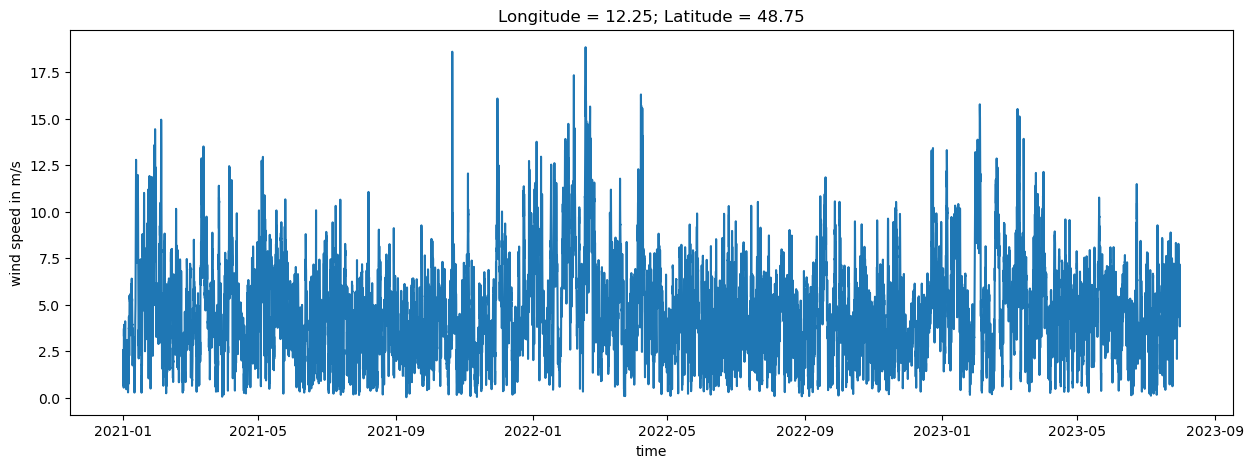

In [5]:
plt.figure(figsize=(15,5))
plt.plot(time[:],ws100[:,loc1,loc1])
sel_lon = np.array(lons[loc1])
sel_lat = np.array(lats[loc1])
plt.title('Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.ylabel('wind speed in m/s')
plt.xlabel('time')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(time[:],ws100[:,loc2,loc2],)
sel_lon = np.array(lons[loc2])
sel_lat = np.array(lats[loc2])
plt.title('Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.ylabel('wind speed in m/s')
plt.xlabel('time')
#plt.yscale('log')
plt.show()



# Brown et al. 1984

(2.080294249026404, 0, 5.878695082058485)


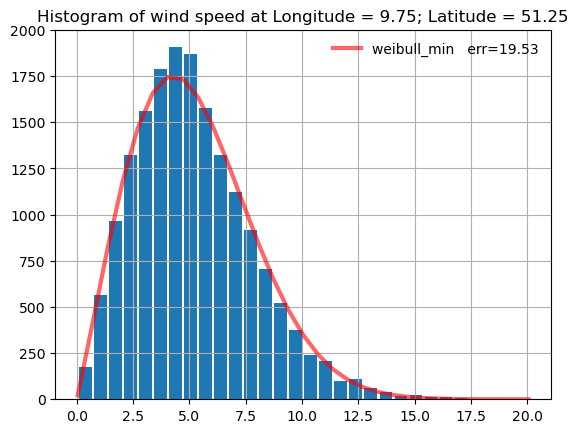

(1.9124403281079496, 0, 5.1871836217174785)


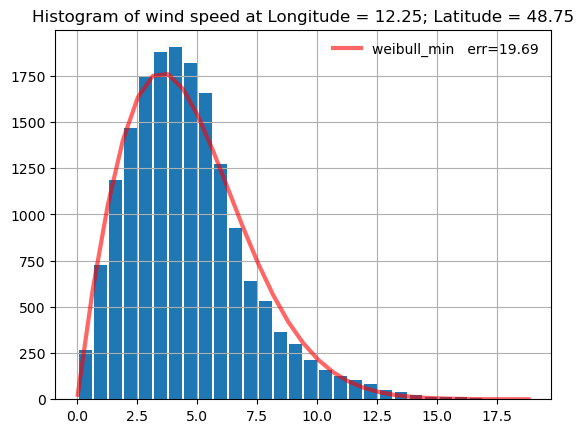

In [8]:
import scipy.stats as s

N=30
x1 = ws100[0:2*24*365,loc1,loc1]
counts, bins = np.histogram(x1, bins=N)
bin_width = bins[1]-bins[0]
total_count = float(sum(counts))

f, ax = plt.subplots(1, 1)

ax.bar(bins[:-1]+bin_width/2., counts, align='center', width=.85*bin_width)
ax.grid('on')
def fit_pdf(x, name='weibull_min', color='r'):
    dist = getattr(s, name)  # params = shape, loc, scale
    params = s.weibull_min.fit(x, floc=0)  # 1-day lag minimum for shipping
    print(params)
    y = dist.pdf(bins, *params)*total_count*bin_width
    sqerror_sum = np.log(sum(ci*(yi - ci)**2. for (ci, yi) in zip(counts, y)))
    ax.plot(bins, y, color, lw=3, alpha=0.6, label='%s   err=%3.2f' % (name, sqerror_sum))
    return y

colors = ['r-', 'g-', 'r:', 'g:']

for name, color in zip(['weibull_min'], colors): # 'lognorm', 'erlang', 'chi2', 'weibull_min', 
    y = fit_pdf(x1, name=name, color=color)

ax.legend(loc='best', frameon=False)
sel_lon = np.array(lons[loc1])
sel_lat = np.array(lats[loc1])
plt.title('Histogram of wind speed at '+'Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.show()


x2 = ws100[0:2*24*365,loc2,loc2]
counts, bins = np.histogram(x2, bins=N)
bin_width = bins[1]-bins[0]
total_count = float(sum(counts))

f, ax = plt.subplots(1, 1)

ax.bar(bins[:-1]+bin_width/2., counts, align='center', width=.85*bin_width)
ax.grid('on')
def fit_pdf(x, name='weibull_min', color='r'):
    dist = getattr(s, name)  # params = shape, loc, scale
    params = s.weibull_min.fit(x, floc=0)  # 1-day lag minimum for shipping
    print(params)
    y = dist.pdf(bins, *params)*total_count*bin_width
    sqerror_sum = np.log(sum(ci*(yi - ci)**2. for (ci, yi) in zip(counts, y)))
    ax.plot(bins, y, color, lw=3, alpha=0.6, label='%s   err=%3.2f' % (name, sqerror_sum))
    return y

colors = ['r-', 'g-', 'r:', 'g:']

for name, color in zip(['weibull_min'], colors): # 'lognorm', 'erlang', 'chi2', 'weibull_min', 
    y = fit_pdf(x2, name=name, color=color)

ax.legend(loc='best', frameon=False)
sel_lon = np.array(lons[loc2])
sel_lat = np.array(lats[loc2])
plt.title('Histogram of wind speed at '+'Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.show()



In [9]:
# statistical overview over distribution of wind time series
N=30
x1 = ws100[0:2*24*365,loc1,loc1]
counts, bins = np.histogram(x1, bins=N)
bin_width = bins[1]-bins[0]
total_count = float(sum(counts))


def fit_pdf(x, name='weibull_min', color='r'):
    dist = getattr(s, name)  # params = shape, loc, scale
    params = s.weibull_min.fit(x, floc=0)  # 1-day lag minimum for shipping
    #y = dist.pdf(bins, *params)*total_count*bin_width
    #sqerror_sum = np.log(sum(ci*(yi - ci)**2. for (ci, yi) in zip(counts, y)))
    #ax.plot(bins, y, color, lw=3, alpha=0.6, label='%s   err=%3.2f' % (name, sqerror_sum))
    return params

colors = ['r-', 'g-', 'r:', 'g:']

for name, color in zip(['weibull_min'], colors): # 'lognorm', 'erlang', 'chi2', 'weibull_min', 
    for i in range(33):
        x1 = ws100[0:2*24*365,i,i]
        params = fit_pdf(x1, name=name, color=color)
        print(params)




(2.2302894957122024, 0, 10.90362025937426)
(2.222940071121411, 0, 10.837260723832529)
(2.226364433163715, 0, 10.790197895267829)
(2.2214029299420064, 0, 10.677533809780005)
(2.2082753363081333, 0, 10.534891612291023)
(2.2227826708162075, 0, 9.655383604077327)
(2.281844426990817, 0, 8.023323551712773)
(2.3168559751189943, 0, 7.198086527923568)
(2.3180890668495, 0, 6.918852317845635)
(2.302896823500422, 0, 6.7469966592617965)
(2.2591540556129655, 0, 6.705473187203784)
(2.2087096002438753, 0, 6.6599009189464216)
(2.190114500209753, 0, 6.530957958771372)
(2.1699440626309734, 0, 6.3148562929795515)
(2.1246613834580916, 0, 6.003021002967081)
(2.080294249026404, 0, 5.878695082058485)
(2.0943823799145127, 0, 6.0079477728045045)
(2.057800404983113, 0, 5.760316616825834)
(2.0653403839928135, 0, 5.486300718666199)
(2.1158820194856505, 0, 5.388902426281078)
(2.09872597184187, 0, 5.405331889786545)
(2.0985823626601428, 0, 5.519088057139362)
(2.1572388324774057, 0, 5.643186864627172)
(2.166402873921

[6.167297296236245e-10, 1.210463840120941e-10, -5.486611000917576e-10, 2.315281574142936e-09, 4.12004842679687e-10, -2.1513679227057144e-09, 1.892347823935772e-09, 1.4552713687364293e-09, -8.042079022228309e-10, -4.872596031885252e-10, -1.7461499815042781e-09, -1.097881121481724e-11, -1.2845209121336172e-09, -1.3484375548787896e-09, 2.654077707494728e-10, 4.990169119258477e-10, -2.923477773231407e-09, 2.7315282302465294e-10, -2.022656332318184e-09, -4.532452498975278e-10, -9.063308079955673e-10, -2.8950526329224984e-09, 7.070354422342302e-11, 1.4448115558699488e-09]


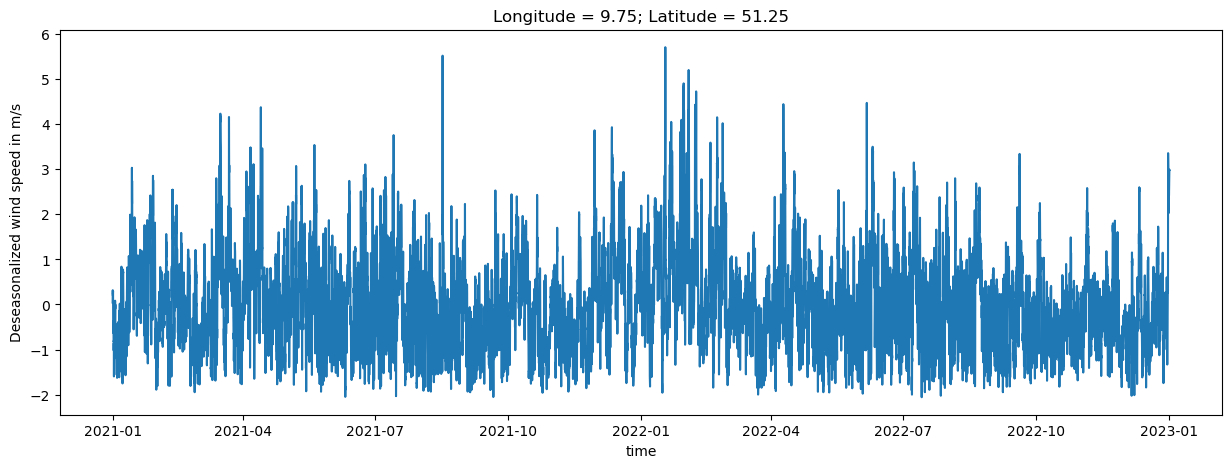

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


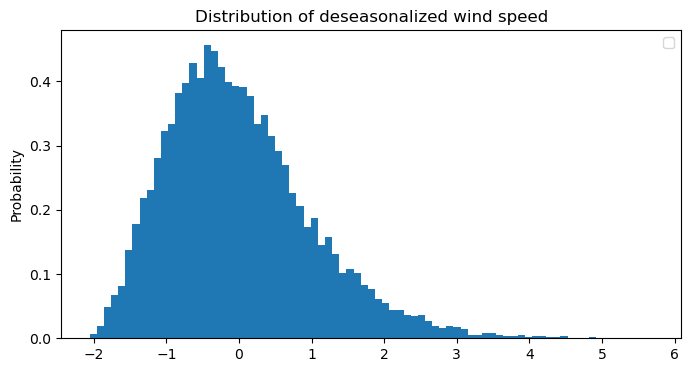

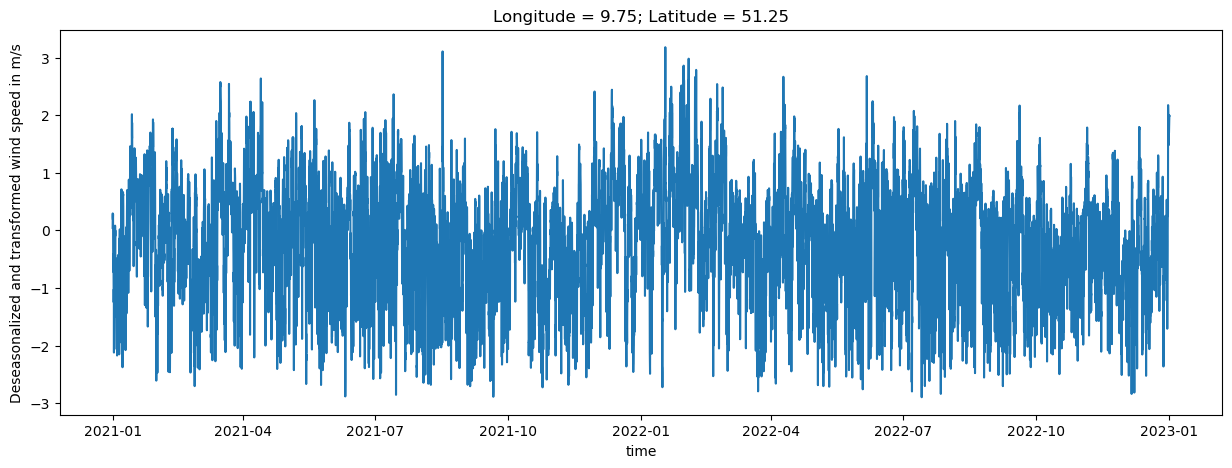

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


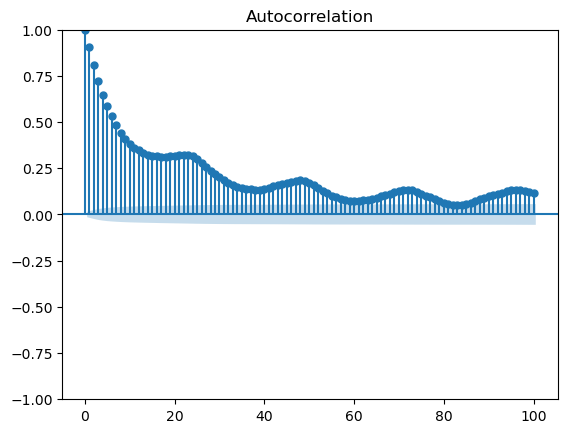

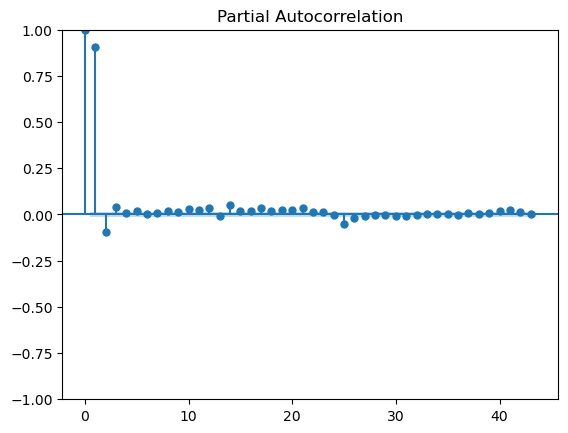

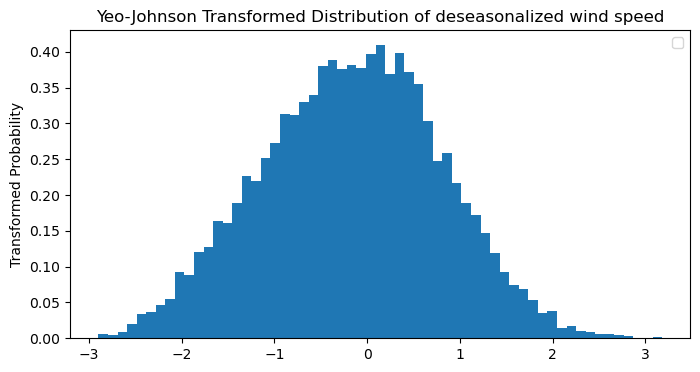

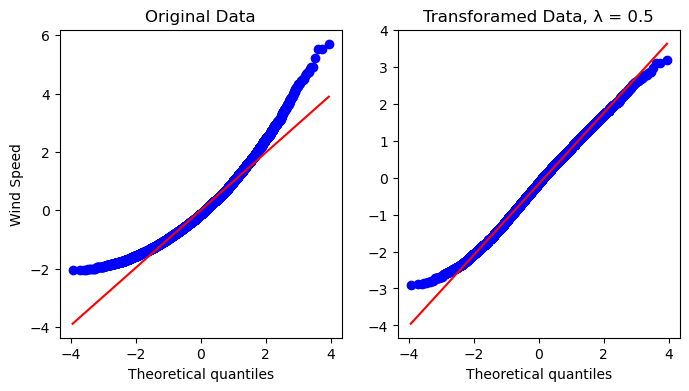

In [11]:
# deseasonalization
mu = []
for i in range(0,24):
    mu.append(0)
    count = 0
    for j in range(i,len(x1)-24,24):
        mu[i] = mu[i] + x1[j]
        count = count + 1

    mu[i] = mu[i]/count

print(mu)

sigma = []
for i in range(0,24):
    sigma.append(0)
    count = 0
    for j in range(i,len(x1)-24,24):
        sigma[i] = sigma[i] + (x1[j] - mu[i])**2
        count = count + 1

    sigma[i] = np.sqrt(sigma[i]/count)

for i in range(0,24):
    for j in range(i,len(x1)-24,24):
        x1[j] = (x1[j] - mu[i])/sigma[i]

plt.figure(figsize=(15,5))
plt.plot(time[0:2*24*365],x1)
sel_lon = np.array(lons[15])
sel_lat = np.array(lats[15])
plt.title('Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.ylabel('Deseasonalized wind speed in m/s')
plt.xlabel('time')
plt.show()

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(x1, bins='auto', density=True)
ax.set_ylabel('Probability')
ax.set_title('Distribution of deseasonalized wind speed')
ax.legend();

#box cox transformation (transform data to normal distribution)
from scipy.special import boxcox, inv_boxcox
x_trans = s.yeojohnson(x1,0.5)

xt = x_trans


plt.figure(figsize=(15,5))
plt.plot(time[0:2*24*365],xt)
sel_lon = np.array(lons[15])
sel_lat = np.array(lats[15])
plt.title('Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.ylabel('Deseasonalized and transformed wind speed in m/s')
plt.xlabel('time')
plt.show()


from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
#The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter.
plot_acf(xt,lags = 100)
#One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF)
plot_pacf(xt)

# visual inspection

fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(xt, bins='auto', density=True)
ax.set_ylabel('Transformed Probability')
ax.set_title('Yeo-Johnson Transformed Distribution of deseasonalized wind speed')
ax.legend();


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

prob = s.probplot(x1, dist=s.norm, plot=ax1)
prob = s.probplot(xt, dist=s.norm, plot=ax2)

ax1.set_title('Original Data')
ax1.set_ylabel('Wind Speed')
ax2.set_title('Transforamed Data, λ = 0.5');
ax2.set_ylabel('');


48


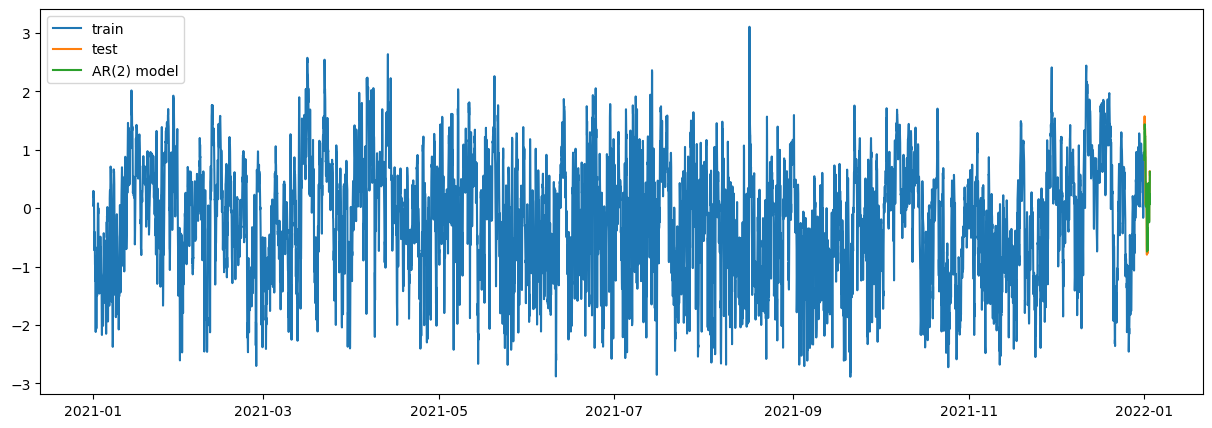

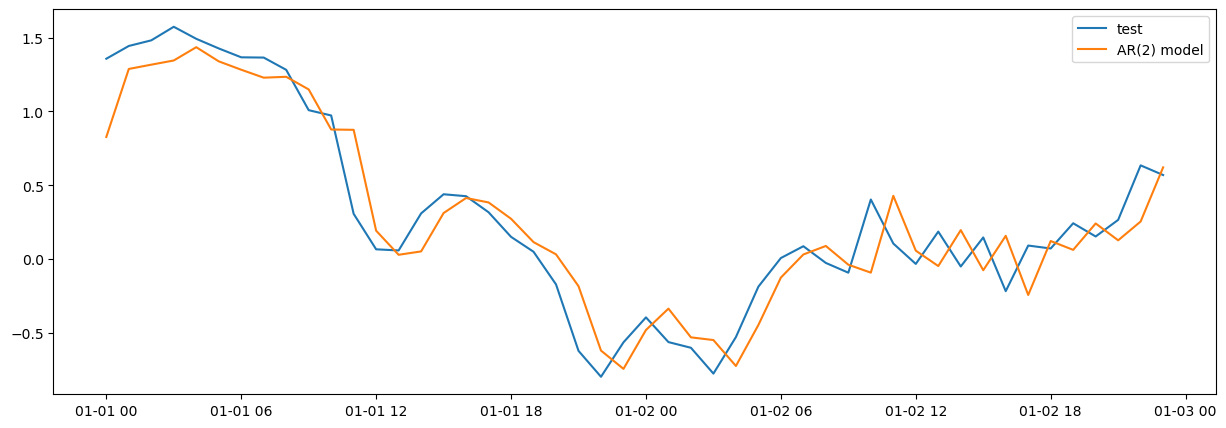

In [12]:
train= x1[:24*365]
test= x1[365*24:2*365*24]

from statsmodels.tsa.statespace.sarimax import SARIMAX

def rolling_forecast(df, train_len, horizon, window):
    
    total_len = train_len + horizon
    end_idx = train_len
    
    pred_AR = []

     
    for i in range(train_len, total_len, window):
        model = SARIMAX(df[:i], order=(2,0,0))
        res = model.fit(disp=False) 
        predictions = res.get_prediction(0, i + window -1 )
        oos_pred = predictions.predicted_mean[-window:]
        pred_AR.extend(oos_pred)
            
    return pred_AR

train_len = 24*365
horizon = 24*2
window = 1
pred_AR = rolling_forecast(xt, train_len, horizon, window)

print(len(pred_AR))

plt.figure(figsize=(15,5))
#plt.plot(time[0:2*24*365],xt,label='data')
plt.plot(time[0:train_len],xt[0:train_len],label='train')
plt.plot(time[train_len:train_len+horizon],xt[train_len:train_len+horizon],label='test')
plt.plot(time[train_len:train_len+horizon],pred_AR,label='AR(2) model')
plt.legend()

plt.figure(figsize=(15,5))
#plt.plot(time[0:2*24*365],xt,label='data')
#plt.plot(time[0:train_len],xt[0:train_len],label='train')
plt.plot(time[train_len:train_len+horizon],xt[train_len:train_len+horizon],label='test')
plt.plot(time[train_len:train_len+horizon],pred_AR,label='AR(2) model')
plt.legend()


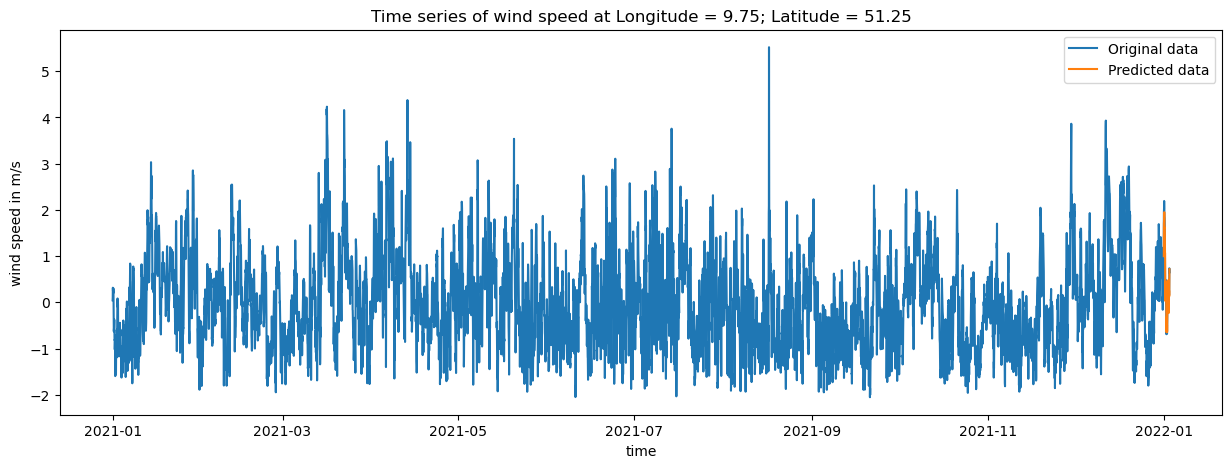

In [13]:
x_new=[x for n in (xt[0:24*365],pred_AR) for x in n]


# invert a yeojhonson transform for one value
def invert_yeojhonson(value, lmbda):
  if value>= 0 and lmbda == 0:
    return np.exp(value) - 1
  elif value >= 0 and lmbda != 0:
    return (value * lmbda + 1) ** (1 / lmbda) - 1
  elif value < 0 and lmbda != 2:
    return 1 - (-(2 - lmbda) * value + 1) ** (1 / (2 - lmbda))
  elif value < 0 and lmbda == 2:
    return 1 - np.exp(-value)
  
xrt = [invert_yeojhonson(x, 0.5) for x in x_new]


for i in range(0,24):
    for j in range(i,len(xrt)-24,24):
        xrt[j] = xrt[j]*sigma[i] + mu[i]


plt.figure(figsize=(15,5))
#plt.plot(time[0:2*24*365],xt,label='data')
plt.plot(time[0:train_len+horizon],x1[0:train_len+horizon],label='Original data')
plt.plot(time[train_len:train_len+horizon],xrt[train_len:train_len+horizon],label='Predicted data')
plt.ylabel('wind speed in m/s')
plt.xlabel('time')
plt.title('Time series of wind speed at '+'Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.legend()

# OU-Process


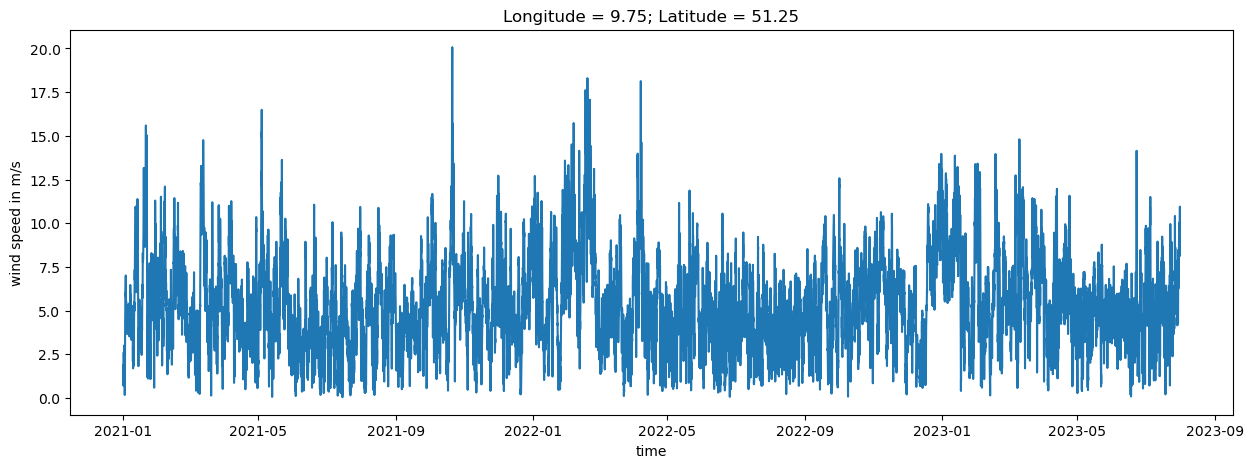

In [6]:
plt.figure(figsize=(15,5))
plt.plot(time[:],ws100[:,loc1,loc1])
sel_lon = np.array(lons[loc1])
sel_lat = np.array(lats[loc1])
plt.title('Longitude = '+str(sel_lon)+'; Latitude = '+str(sel_lat))
plt.ylabel('wind speed in m/s')
plt.xlabel('time')
plt.show()

c:\Users\Anwender\.conda\envs\rivapy\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


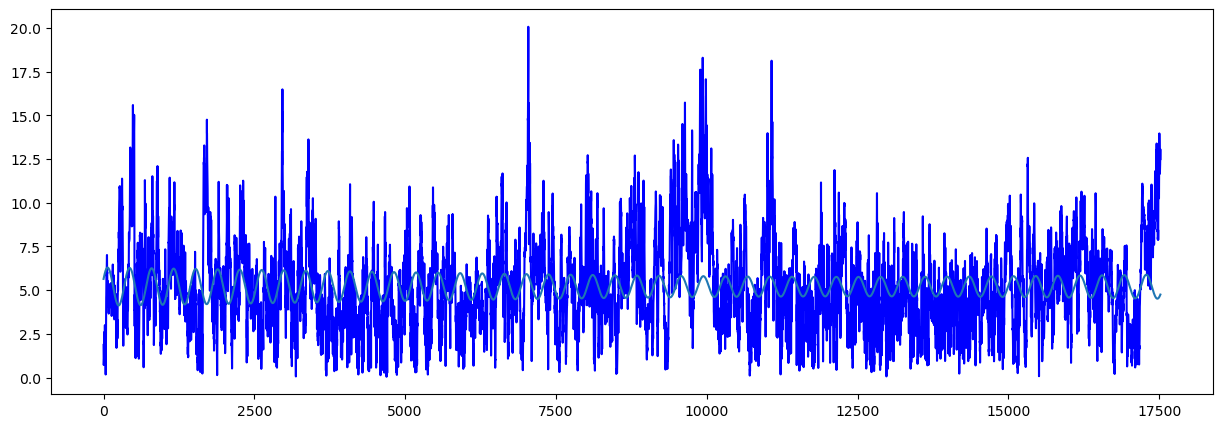

In [34]:
# deseasonalize by fitting 
# a_1 + a_2 sin(2*pi*t/365) + a_3 cos(2*pi*t/365)
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
xdata = np.linspace(0, 2*365*24,2*365*24)
ydata = ws100[0:2*365*24,loc1,loc1]

def func(x, a, b, c,d,e):
    return a + b* np.sin(b*2.*np.pi * x/(365.)) + d* np.cos(e*2.*np.pi * x/365.)

popt, pcov = curve_fit(func, xdata, ydata)
print(popt)

plt.figure(figsize=(15,5))
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt))